In [6]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow

**Had to Reshape the Image to 64x64 to get rid of long waitings.**

In [ ]:
frame_rate = 150
prev = 0
count = 0
vid = np.zeros((220,64,64))
cap = cv2.VideoCapture('/content/gg.mp4')
starttime = time.time()

ret , frame = cap.read()
k = frame
while ret == True:
  

  #cv2_imshow(frame)
  ret,frame =cap.read()

  try:
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,(64,64))
    vid[count] = frame
  except:
    continue
  time_elapsed = time.time() - prev
  if time_elapsed > 1./frame_rate:
    count = count+1
    #cv2_imshow(frame)
    prev = time.time()

endtime = time.time()
print(count)
print(endtime-starttime)

In [55]:
print(vid.shape)

(220, 64, 64)


In [56]:
vid = vid[:220,:,:]

In [57]:
print(vid.shape)

(220, 64, 64)


In [58]:
M = vid.reshape((-1, vid.shape[1]*vid.shape[2])).T

In [59]:
M.shape

(4096, 220)

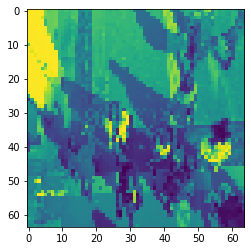

In [60]:
plt.imshow(M[:,1].reshape(64,64))

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces

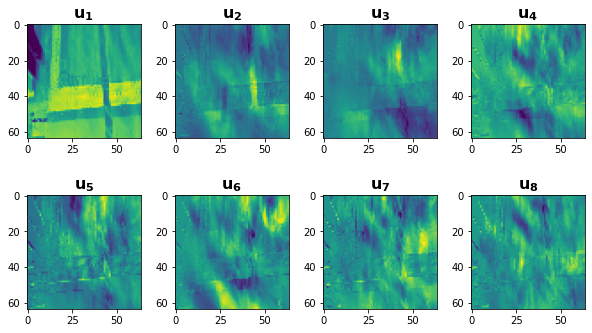

In [62]:
U, s, VT = LA.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((64,64)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)
    
plt.show()

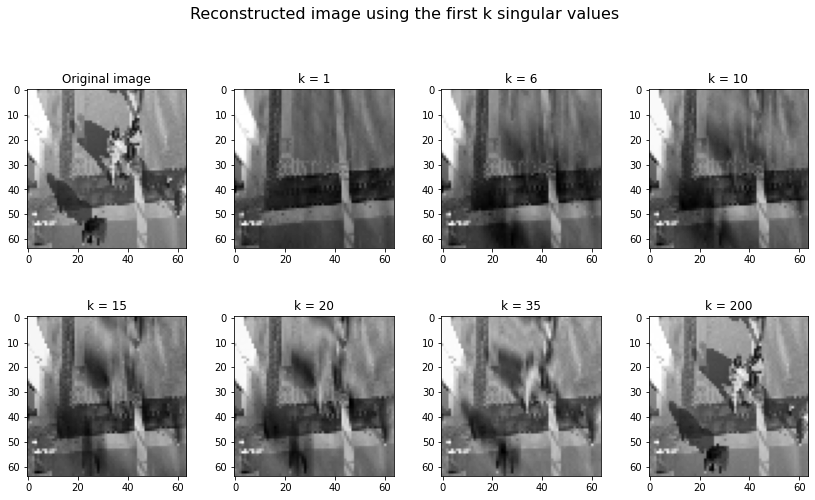

In [63]:
x= np.zeros((220, 1))
x[160, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(vid[160], cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 6, 10, 15, 20, 35, 200]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1] 
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()